In [163]:
import pandas as pd
from skimage.io import imread, imshow
from skimage.transform import resize
import numpy as np
import glob
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Reconocimiento de imágenes 

Se realizará la limpieza de los datos para generar un modelo que permita reconcer si una persona tiene o no gafas. 

Se ilustra una imagen en blanco y negro para ejemplicar el desarrollo de las demás imágenes.

(1024, 1024, 3)


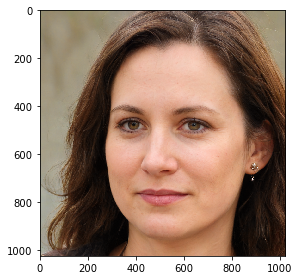

In [4]:
img1 = imread('faces-spring-2020/faces-spring-2020/face-298.png') # Lectura de la imagen
print(img1.shape)
imshow(img1)

(1024, 1024)


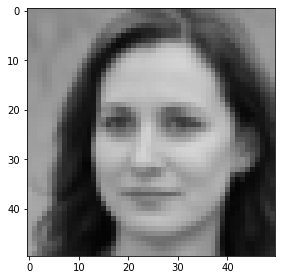

In [5]:
img1 = imread('faces-spring-2020/faces-spring-2020/face-298.png', as_gray=True) # Lectura de la imagen
print(img1.shape)
img2 = resize(img1, (50, 50))# Redimensionamiento de la imagen
imshow(img2)


## Matriz de datos

Se convierte cada matriz de imagene en un arreglo de una dimensión y se dispone en una matriz general con 2500 variables y 5000 registros.

In [7]:
pixels=[]
for f in glob.glob('faces-spring-2020/faces-spring-2020/face-*.png'): 
    img1 = imread(f, as_gray=True)
    img2 = resize(img1, (50, 50))
    pixels.append(img2.flatten())

In [17]:
df = pd.DataFrame(pixels)

In [20]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0.687360,0.687990,0.686401,0.683906,0.682788,0.680144,0.679172,0.679243,0.674427,0.667735,...,0.435021,0.434253,0.424005,0.412268,0.441103,0.489896,0.528866,0.548530,0.554735,0.557974
1,0.807417,0.808155,0.809996,0.810080,0.810548,0.810759,0.810719,0.811200,0.812683,0.812836,...,0.535190,0.610607,0.717197,0.756314,0.756590,0.757551,0.752476,0.747796,0.743862,0.742932
2,0.420396,0.430901,0.411650,0.372949,0.346136,0.410431,0.444938,0.419929,0.394974,0.386316,...,0.368357,0.389626,0.349219,0.252578,0.279896,0.357452,0.485977,0.613899,0.636785,0.593817
3,0.381868,0.360146,0.327816,0.284588,0.234243,0.198648,0.184768,0.176361,0.173372,0.173120,...,0.366553,0.372309,0.371300,0.359824,0.335754,0.290390,0.133623,0.045174,0.075897,0.233004
4,0.805568,0.806957,0.808658,0.808575,0.809636,0.809304,0.809014,0.809000,0.807470,0.803572,...,0.464456,0.654288,0.750882,0.759207,0.761042,0.761460,0.759648,0.757951,0.755778,0.753353
5,0.757774,0.729358,0.734175,0.713148,0.633475,0.657614,0.661386,0.661792,0.709884,0.749812,...,0.894202,0.917870,0.876134,0.845218,0.854065,0.825507,0.752336,0.653351,0.584319,0.556792
6,0.434631,0.412046,0.398087,0.391295,0.365725,0.345740,0.365931,0.391970,0.383477,0.373820,...,0.312137,0.244895,0.266820,0.279041,0.303488,0.333238,0.351654,0.349757,0.388025,0.449886
7,0.851398,0.851798,0.852618,0.851314,0.852124,0.852430,0.854044,0.855290,0.856253,0.857440,...,0.167554,0.176046,0.182813,0.164991,0.154441,0.144978,0.133847,0.133456,0.141179,0.141307
8,0.218401,0.283386,0.334796,0.375566,0.386046,0.363628,0.354088,0.365615,0.379064,0.400948,...,0.706864,0.731835,0.725674,0.632642,0.682199,0.724350,0.747240,0.759045,0.754782,0.709188
9,0.661056,0.663161,0.667478,0.669094,0.667618,0.669228,0.671901,0.672746,0.673369,0.675058,...,0.580889,0.586914,0.587752,0.588264,0.594723,0.595383,0.585803,0.581943,0.577415,0.568660


In [19]:
df.shape

(5000, 2500)

Esta base de datos fue obtenida a través de [Kaggle](https://www.kaggle.com/jeffheaton/glasses-or-no-glasses?select=train.csv), allí se presentan dos matrices, una de entrenamiento y otra de prueba sin embargo estas no son tenidas porque no se detalla como fue obtenida. A pesar de esto, es necesario tomar las etiquetas de gafas o sin ellas para plasmarla en en la base de datos creada.

In [177]:
labeltr = pd.read_csv('train.csv', usecols= ['glasses'])

Debido a que solo se tienen etiquetadas las primeras 4500 registros, es necesario reducir la matriz de datos a un tamaño de 4500 X 2500

In [27]:
df = df.head(4500)

In [29]:
df['glasses'] = labeltr

In [30]:
df.shape

(4500, 2501)

In [31]:
#df.to_csv('datos-total.csv',index = False, encoding = 'utf-8') # Se guarda la matriz general para evitar volver a generarla y reducir tiempo computacional

# Estadísticos descriptivos

Debido a gran cantidad de datos al tratarse de tantas imágenes es necesario crear estadísticos para cada variable en la matriz.

### Rostro promedio

In [3]:
df = pd.read_csv('datos-total.csv', encoding = 'utf-8')

In [3]:
df2 = df.copy()

In [5]:
df2.drop(['glasses'], axis = 1, inplace = True)

In [6]:
dfmean = df2.mean()

In [7]:
dfmean.shape

(2500,)

In [8]:
sm = np.array(dfmean.tolist()).reshape(1,2500)

In [9]:
sm.shape

(1, 2500)

In [10]:
sm2 = sm.reshape(50,50)

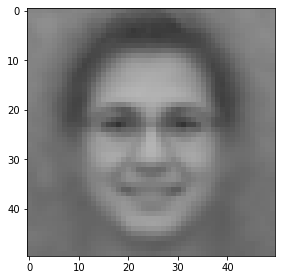

In [11]:
imshow(sm2)

El rostro promedio que se exhibe  tiene dos caracteristicas, la primera que a vista del ojo humano el rostro posee gafas y la segunda menos relevante para el próposito del trabajo es que la facción es sonriente.

Debido a que el rostro promedio tiende a tener gafas para el ojo humano, se plantea la hipótesis que la muestra este desbalanceada. Para refutar esta, se enseña la distribución de los datos.

array([[<AxesSubplot:title={'center':'glasses'}>]], dtype=object)

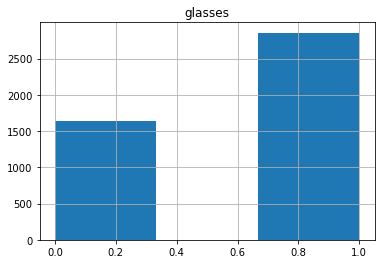

In [13]:
df[['glasses']].hist(bins = 3) 

El gráfico anterior marca una tendencia pero no se muestra un desbalanceamiento en las clases. <font color = 'red'> Buscar a partir de cuánto se considera desbalanceado

### Desviación estándar de los rostros

In [14]:
df_std = df2.std()

In [15]:
df_std.shape

(2500,)

In [16]:
sm2 = np.array(df_std.tolist()).reshape(1,2500) 

In [17]:
sm3 = sm2.reshape(50,50)

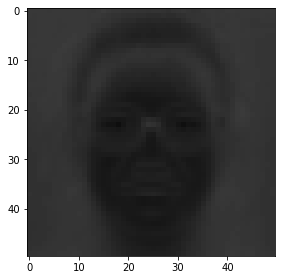

In [18]:
imshow(sm3)

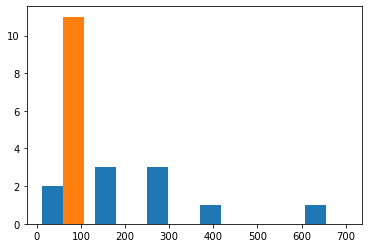

In [19]:
a = np.histogram(sm3)
_ = plt.hist(a, bins='auto') 
plt.show()

Se van a filtrar todos los valores de la desviación estándar tiene una desviación estándar inferior a 0.07.

In [20]:
sm3[sm3 < 0.07] = 0

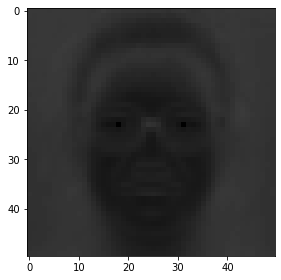

In [21]:
imshow(sm3)

Se aprecia que los valores donde menos variación hay es en la pupila de los rostros, como es de esperarse. Esta base de datos cuenta con una gran variabilidad, lo que indica que todas las imágenes de la base de datos son desde diferentes posiciones y formas.

## Análisis de componentes principales.

Se realizará el análisis de componentes principales para reducir la dimensionalidad de la matriz general de datos.

In [4]:
df3 = df.copy()

In [5]:
variab =  list(df3.columns)

In [6]:
variab.remove('glasses')

In [7]:
df3['glasses'].unique()

array([0, 1], dtype=int64)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df3[variab].values, df3['glasses'].values)

In [95]:
type(y_train)

numpy.ndarray

In [9]:
sc = StandardScaler()
Train = sc.fit_transform(X_train)

In [19]:
pca = PCA()

In [20]:
pca.fit(Train)

PCA()

Se crea una Dataframe para analizar las distribución de los componentes principales. El dataframe se exporta para analizar el archivo en texto plano y evitar gasto computancional

In [21]:
tt  = pca.explained_variance_ratio_.cumsum()

In [22]:
ttr = pd.DataFrame(tt)

In [26]:
ttr.reset_index(inplace = True)
ttr['index'] = ttr['index'].apply(lambda x: x+1)
ttr.rename(columns = {0:'Variability'}, inplace = True)

In [27]:
ttr.head()

,index,Variability
0,1,0.232948
1,2,0.332284
2,3,0.409531
3,4,0.477015
4,5,0.542914


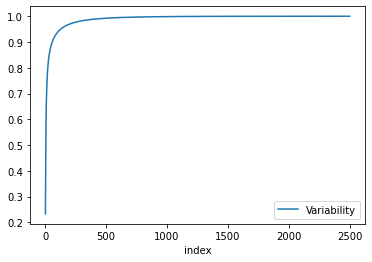

In [29]:
ax = plt.gca()

ttr.plot(kind='line',x='index',y='Variability',ax=ax)

plt.show()

In [23]:
#ttr.to_excel('cumulative.xlsx',encoding = 'utf-8', index = False)

La aplicación de análisis de componentes principales optimiza el rendimiento de la creación del modelo, pues al detallar se observa que las  80 primeras componentes principales se retiene una variabilidad en la información del 93%

In [10]:
pca = PCA(0.9248)
pca.fit(Train)
Xtr_PC = pca.transform(Train)
Xtr_PC.shape

(3375, 81)

In [11]:
X_test = sc.transform(X_test)

In [12]:
Xte_PC = pca.transform(X_test)

### Se presenta a continuación tres imágenes

<ul>
  <li>La primera imagen corresponde a la imagen real a color en las dimensiones originales </li>
  <li>La segunda corresponde a la imagen real a blanco y negro en las dimensiones en la que se procesasn los datos (50 x 50)</li>
  <li>La tercera corresponde a la proyección de los datos originales en dimensiones 9x9 donde se retiene el 93 % de la variabilidad de la segunda imagen. Es importante mencionar que la imagen resulta a color pues cuando se realiza la proyección sobre las componentes principales se puede salir del rango de la escala de grises</li>
</ul>

Text(0.5, 1.0, 'Third')

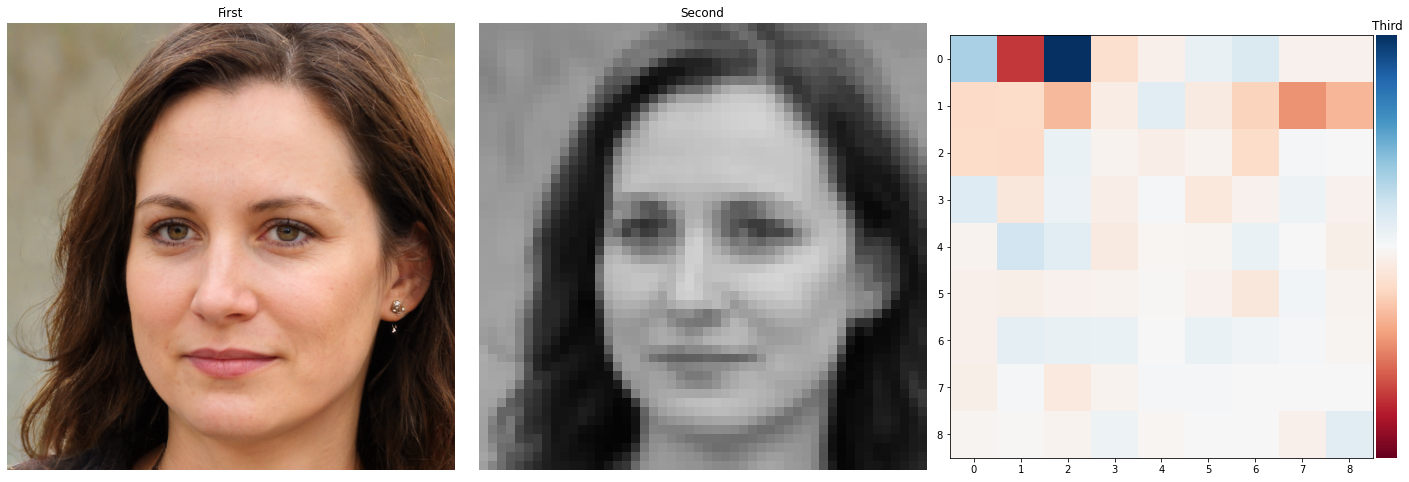

In [119]:
sm10 = np.array(Xte_PC[1038].tolist()).reshape(1,81) 
sm10 = sm10.reshape(9,9)

fig = plt.figure(figsize=(20, 20))

rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)

img1 = imread('faces-spring-2020/faces-spring-2020/face-298.png')
plt.imshow(img1)
plt.axis('off')
plt.title("First")

fig.add_subplot(rows, columns, 2)

img2 = imread('faces-spring-2020/faces-spring-2020/face-298.png', as_gray=True) # Lectura de la imagen
img2 = resize(img2, (50, 50))# Redimensionamiento de la imagen
imshow(img2)
plt.axis('off')
plt.title("Second")

fig.add_subplot(rows, columns, 3)

imshow(sm10)
plt.axis('off')
plt.title("Third")


Text(0.5, 1.0, 'Third')

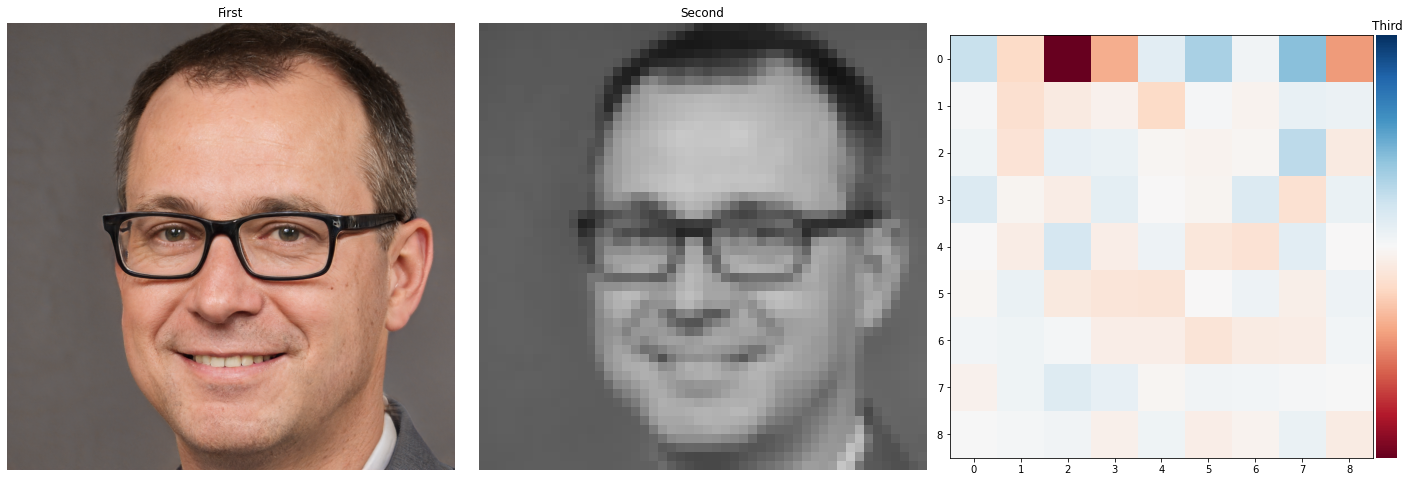

In [120]:
sm10 = np.array(Xtr_PC[3341].tolist()).reshape(1,81) 
sm10 = sm10.reshape(9,9)

fig = plt.figure(figsize=(20, 20))

rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)

img1 = imread('faces-spring-2020/faces-spring-2020/face-32.png')
plt.imshow(img1)
plt.axis('off')
plt.title("First")

fig.add_subplot(rows, columns, 2)

img2 = imread('faces-spring-2020/faces-spring-2020/face-32.png', as_gray=True) # Lectura de la imagen
img2 = resize(img2, (50, 50))# Redimensionamiento de la imagen
imshow(img2)
plt.axis('off')
plt.title("Second")

fig.add_subplot(rows, columns, 3)

imshow(sm10)
plt.axis('off')
plt.title("Third")

### Evaluación del modelo

In [139]:
from pycaret.classification import * 

Se evaluarán varios modelos de clasificación para determinar aquel con mejor comportamiento.

In [142]:
dfTrain =  pd.DataFrame(Xtr_PC)

In [143]:
dfTrain['Glasses'] = y_train

In [144]:
dfTrain['Glasses'].unique()

array([1, 0], dtype=int64)

In [145]:
clf = setup(dfTrain, target='Glasses')

,Description,Value
0,session_id,3631
1,Target,Glasses
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(3375, 82)"
5,Missing Values,False
6,Numeric Features,81
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [22]:
model = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6203,0.4803,0.9085,0.6465,0.7554,0.0045,0.0062
1,0.6456,0.5776,0.9412,0.6575,0.7742,0.0587,0.0872
2,0.6314,0.5626,0.9346,0.6500,0.7668,0.0085,0.0132
3,0.6483,0.5092,0.9542,0.6577,0.7787,0.0476,0.0780
4,0.6568,0.5945,0.9605,0.6606,0.7828,0.0829,0.1328
5,0.6271,0.5027,0.9013,0.6524,0.7569,0.0382,0.0493
6,0.6483,0.5181,0.9342,0.6605,0.7738,0.0783,0.1096
7,0.5975,0.4688,0.8553,0.6404,0.7324,-0.0160,-0.0190
8,0.6356,0.4905,0.9408,0.6500,0.7688,0.0295,0.0459
9,0.6229,0.4980,0.9013,0.6493,0.7548,0.0242,0.0317


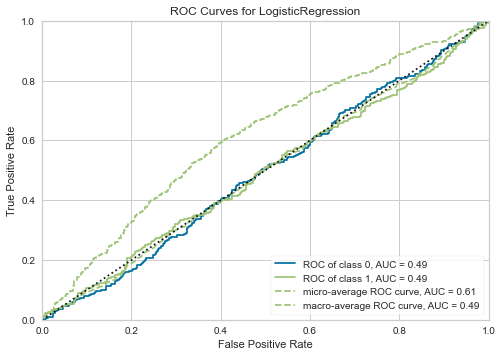

In [24]:
plot_model(model)

Se obtiene un AUC = 0.5, el cual es el peor de los casos pues es equivalente a lazar una moneda al aire y esperar que caiga cara o cruz

### Red Neuronal

Debido a los malos resultados obtenidos se plantea la implementación de una red neuronal.

In [28]:
from keras.models import Sequential
from keras.layers import Dense

In [29]:
variab = list (dfTrain.columns)
variab.remove('Glasses') 

In [31]:
dfTrain.shape

(3375, 82)

In [133]:
model = Sequential([
    Dense(81, activation = 'softmax', input_shape = (81,)),
    Dense(81, activation = 'sigmoid'),
    Dense(81, activation = 'softmax'),
    Dense(81, activation = 'sigmoid'),
    Dense(1, activation = 'softmax'),
])

In [134]:
model.compile(optimizer = 'sgd', 
              loss = 'binary_crossentropy', metrics=['accuracy'])

In [35]:
dfTest = pd.DataFrame(Xte_PC)

In [36]:
dfTest['Glasses'] = y_test

In [135]:
hist = model.fit(dfTrain[variab],dfTrain['Glasses'],
                 epochs = 100, verbose = 0)

In [136]:
model.evaluate(dfTest[variab],dfTest['Glasses'])

36/36 [==============================] - 0s 3ms/step - loss: 5.7879 - accuracy: 0.6204


[5.787932395935059, 0.6204444169998169]

### Logistic Regression

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [149]:
cld = LogisticRegression(random_state = 1101).fit(dfTrain[variab],dfTrain['Glasses'])

In [150]:
predic = cld.predict(dfTrain[variab])

In [152]:
cm = confusion_matrix(dfTrain['Glasses'], predic)
cm

array([[  66, 1151],
       [  57, 2101]], dtype=int64)

In [153]:
predictes = cld.predict(dfTest[variab])

In [154]:
cm2 = confusion_matrix(dfTest['Glasses'], predictes)
cm2

array([[ 22, 405],
       [ 18, 680]], dtype=int64)

In [156]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [157]:
param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']}]

In [159]:
clf = GridSearchCV( LogisticRegression(),param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

### Evaluación

In [200]:
import cv2
im5 = cv2.imread('ClasificadasPGM/Con Lentes/Cara_14.pgm',-1)#C:\Users\usuario\TAE\Imagenes\ClasificadasPGM\Con Lentes

In [171]:
im5.shape

(120, 128)

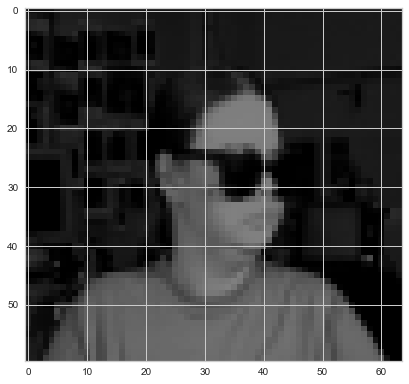

In [201]:
imshow(im5)

Se guardan todas las imágenes en una matriz de datos, para evaluar su comportamiento.

In [175]:
pixels=[]
for f in glob.glob('ClasificadasPGM/Con Lentes/Cara_*.pgm'): 
    img1 = cv2.imread(f, -1)
    img2 = resize(img1, (50, 50))
    pixels.append(img2.flatten())
for f in glob.glob('ClasificadasPGM/Sin Lentes/Cara_*.pgm'): 
    img1 = cv2.imread(f, -1)
    img2 = resize(img1, (50, 50))
    pixels.append(img2.flatten())

In [179]:
Eval = pd.DataFrame(pixels)

In [180]:
Eval.reset_index(inplace = True)

In [181]:
Eval.head()

,index,0,1,2,3,4,5,6,7,8,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.608745,0.681137,0.533843,0.304212,0.347788,0.420314,0.170408,0.087451,0.023608,0.000000
1,1,0.003529,0.003859,0.005686,0.006659,0.006565,0.006063,0.005561,0.004667,0.004314,...,0.390557,0.437459,0.324667,0.212831,0.209067,0.260306,0.095035,0.052549,0.018518,0.001647
2,2,0.005765,0.015522,0.104078,0.110353,0.108494,0.105671,0.102596,0.101922,0.100227,...,0.498431,0.496243,0.494549,0.490980,0.489176,0.484157,0.473875,0.338902,0.171718,0.157804
3,3,0.082094,0.240235,0.213216,0.209020,0.205075,0.200494,0.196706,0.192510,0.187216,...,0.877467,0.874816,0.859569,0.866118,0.865514,0.856212,0.833192,0.714902,0.097498,0.005490
4,4,0.140290,0.135608,0.133333,0.129490,0.124471,0.119451,0.114431,0.113333,0.106824,...,0.238024,0.324980,0.247490,0.204659,0.205318,0.151286,0.192478,0.187843,0.182824,0.180839


In [183]:
Eval['Glasses'] = Eval['index'].apply(lambda x: 1 if x <= 932 else 0)

In [184]:
col = list(Eval.columns)

In [185]:
col.remove('index')

In [186]:
Eval =  Eval[col]

In [187]:
Eval.shape

(1872, 2501)

In [188]:
Eval = Eval.sample(frac=1).reset_index(drop=True)

In [189]:
Eval.shape

(1872, 2501)

### Adecuación de los datos de evaluación para ingresar al modelo

In [190]:
Var = list(Eval.columns)
Var.remove('Glasses')


In [191]:
EvalS = sc.transform(Eval[Var])

In [194]:
EvalPc = pca.transform(EvalS)

In [195]:
PrEval = cld.predict(EvalPc)

In [198]:
cm = confusion_matrix(Eval['Glasses'], PrEval)
cm

array([[327, 612],
       [257, 676]], dtype=int64)

In [199]:
Acc = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
Acc


0.5357905982905983